In [39]:
'''Hi, This is a quick representation of our state covid-19 data (district wise)'''

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
os.chdir('C:\\Users\\happy\\Desktop\\project 001\\Telangana_COVID-19')

In [4]:
#reading the geospacial data of our state telangana(district wise)
geo_districts=gpd.read_file('Telangana_Districts Loc Data/District_Boundary.shp')
geo_districts=geo_districts.sort_values('Dist_Name')

#this is the day wise district covid-19 records availabel at twitter handel of health ministry
dist_wise_data='Day_Wise_District_Data.xlsx'
dist_wise_cases=pd.read_excel(dist_wise_data,'4-4')

dist_wise_cases=dist_wise_cases.sort_values('District')
dist_wise_cases.columns=['Dist_Name','Active Cases']

#print(geo_districts['Dist_Name'].values, dist_wise_cases['Dist_Name'].values)
#print(geo_districts['Dist_Name'].values==dist_wise_cases['Dist_Name'].values)
geo_districts.replace(geo_districts['Dist_Name'].values,dist_wise_cases['Dist_Name'].values,inplace=True)


D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


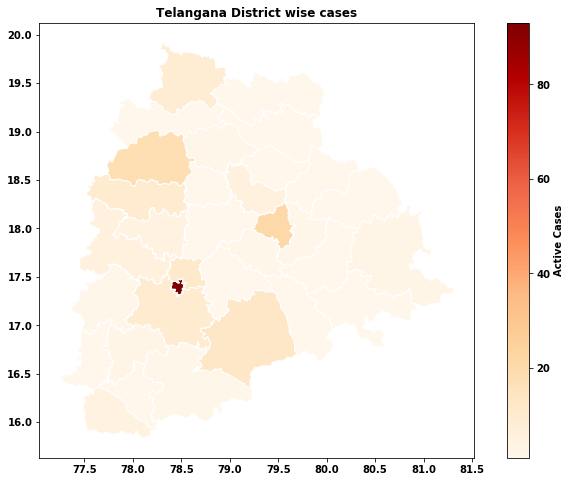

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


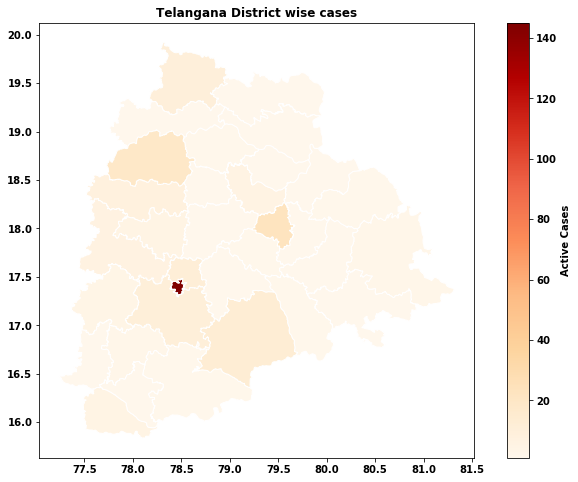

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


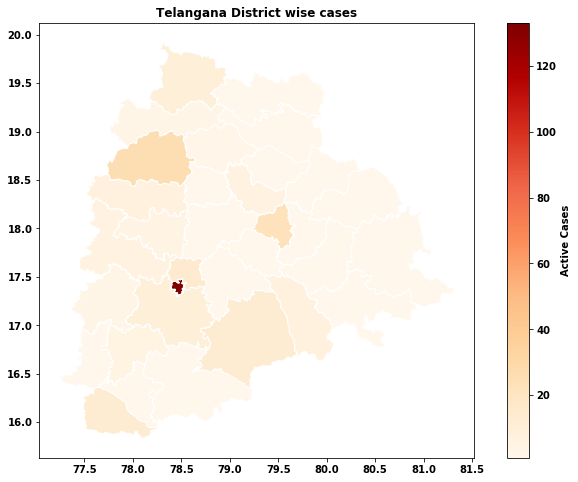

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


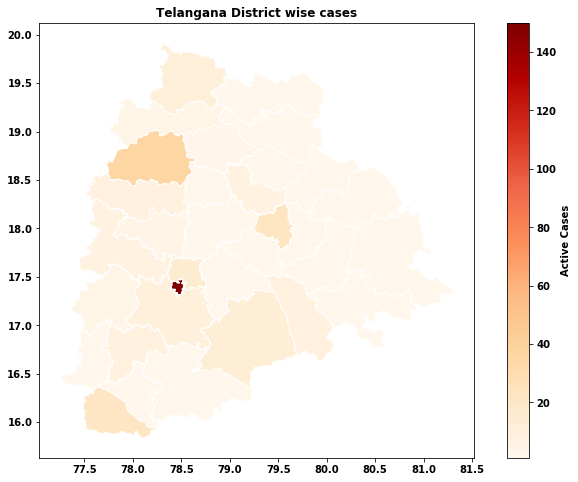

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


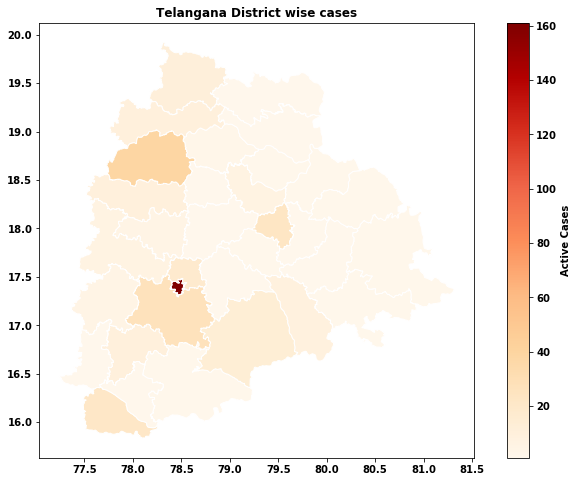

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


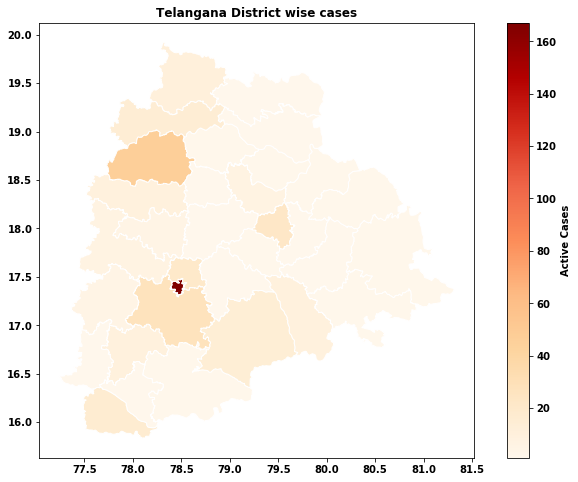

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


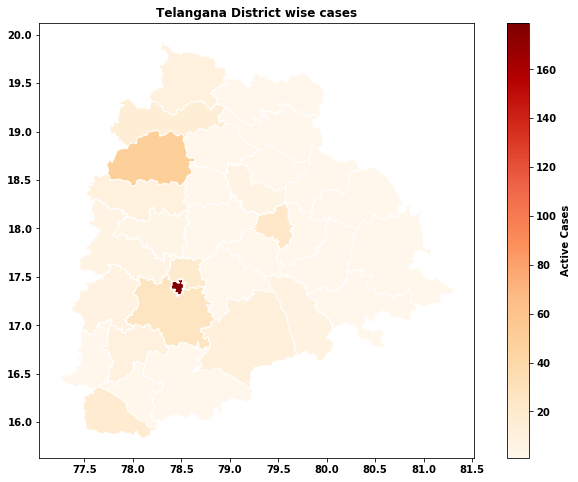

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


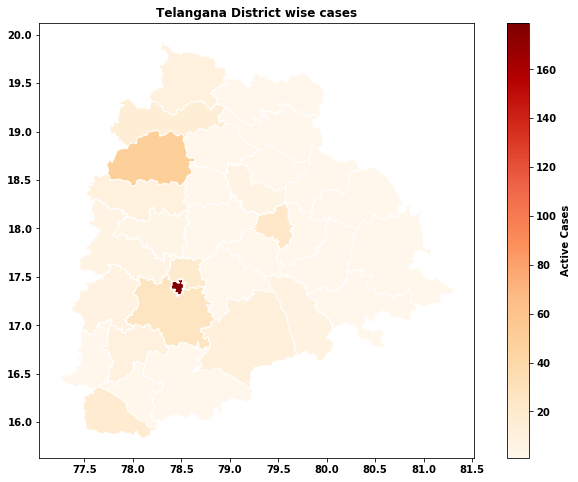

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


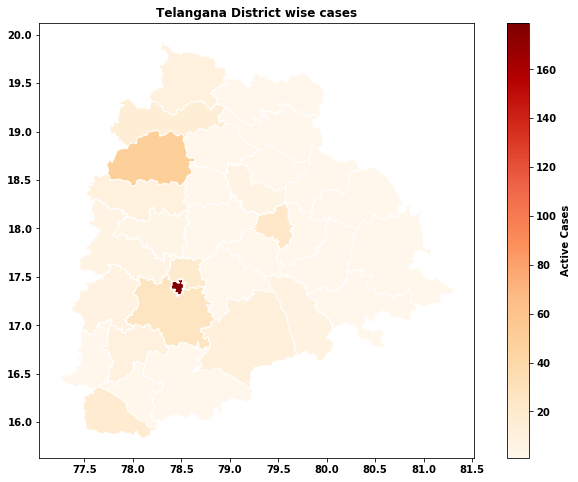

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


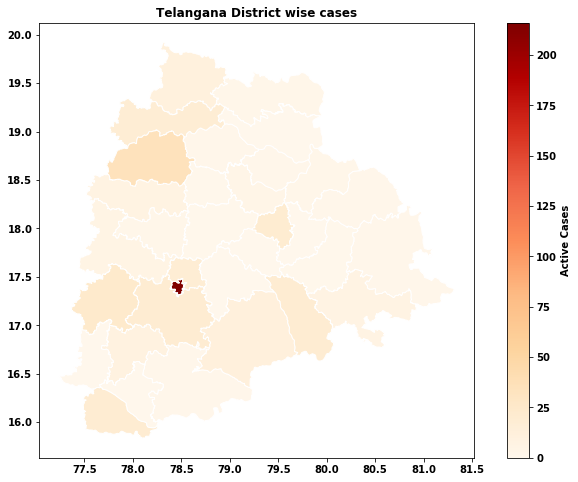

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


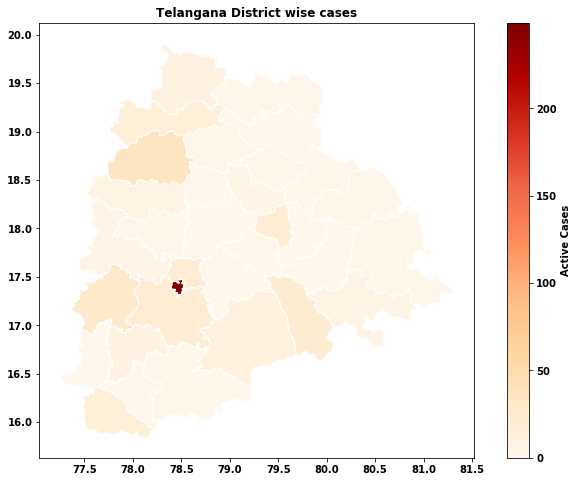

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


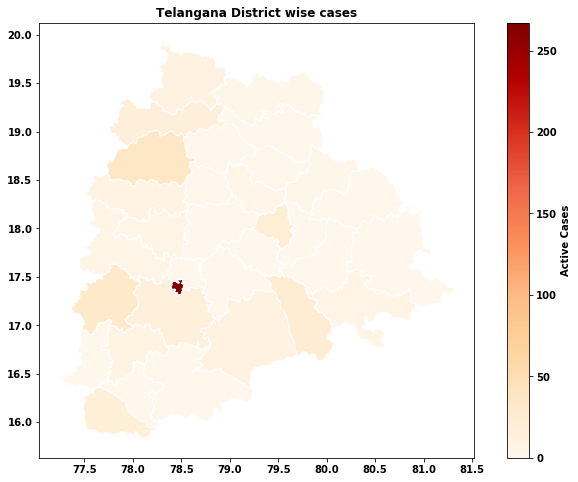

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


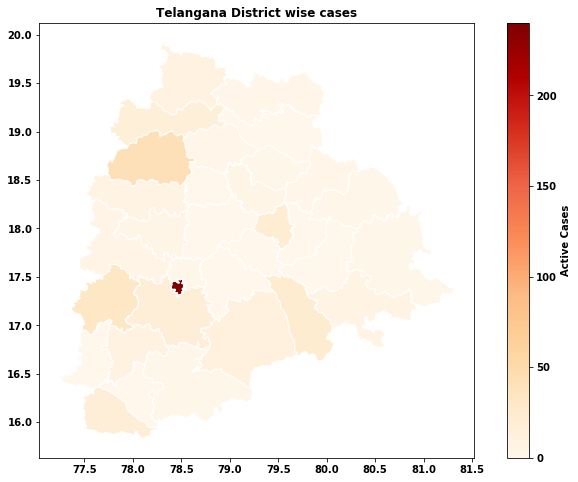

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


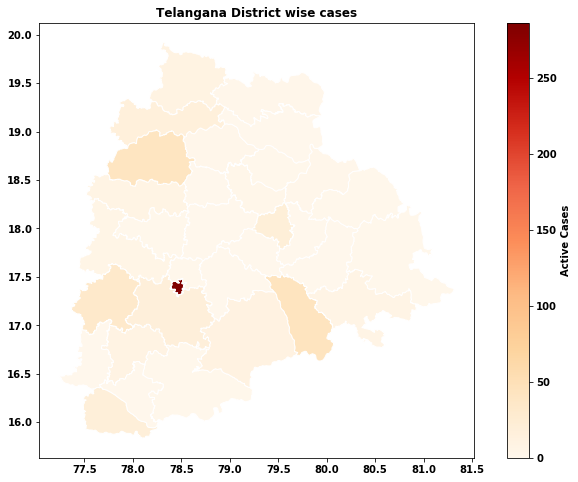

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


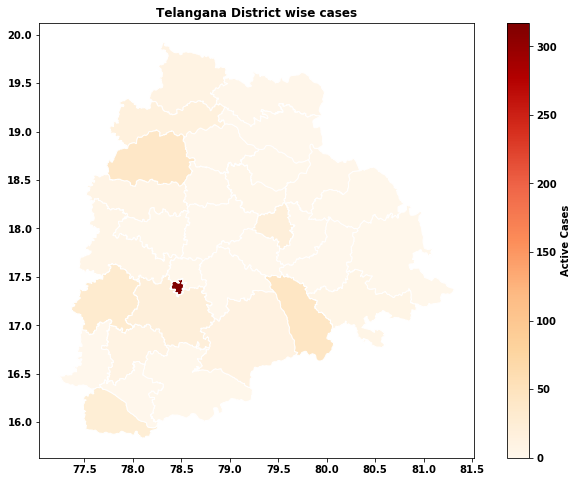

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


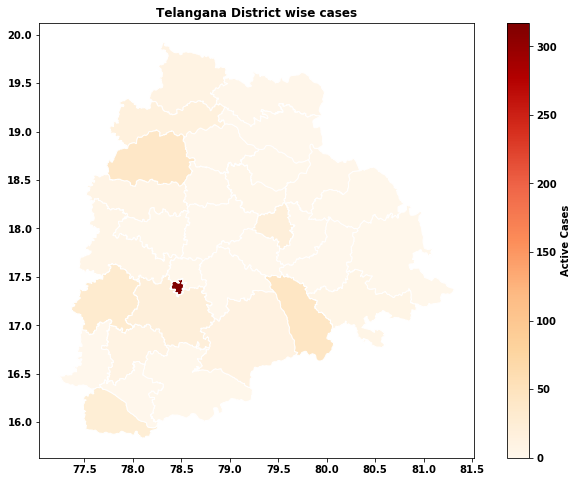

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


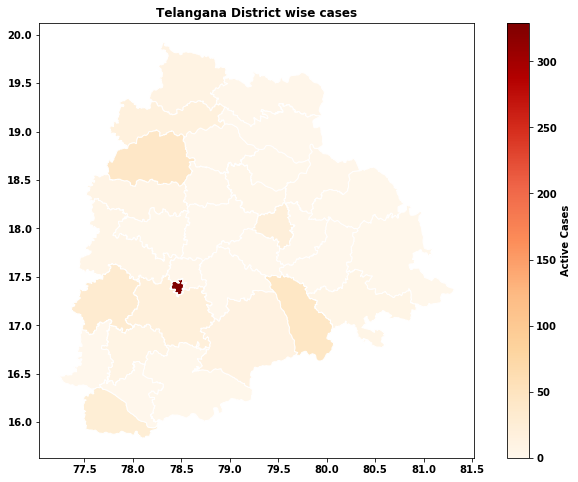

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


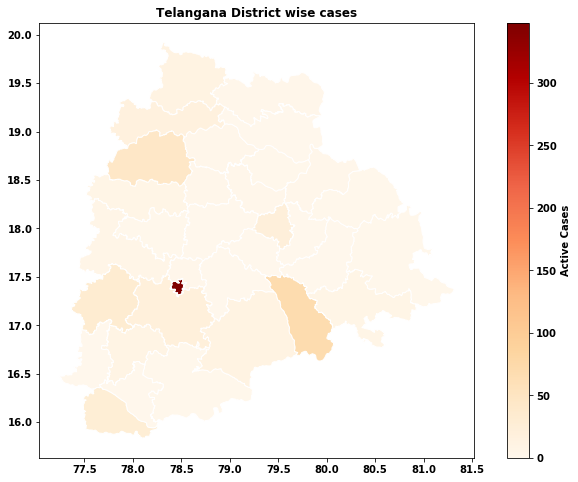

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


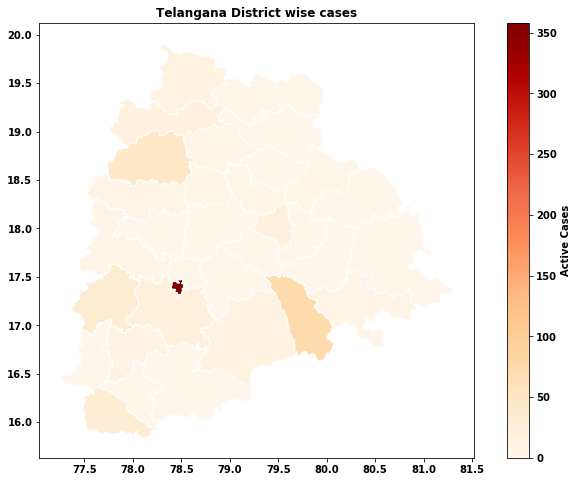

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


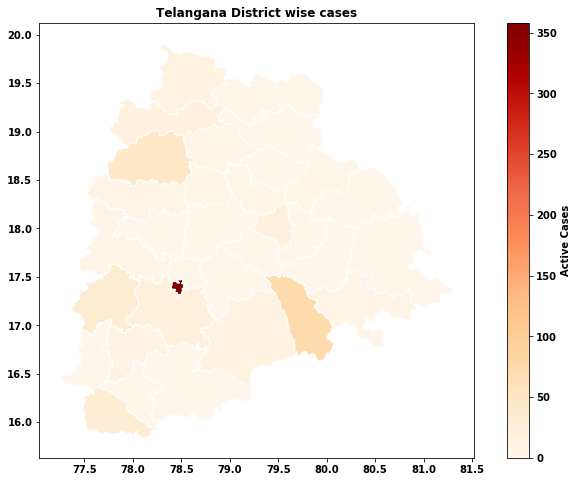

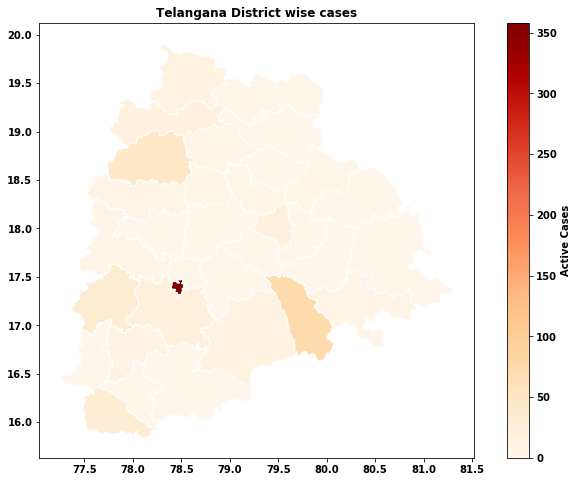

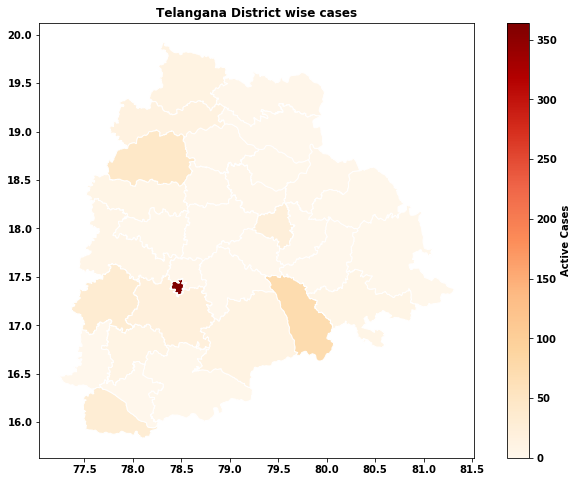

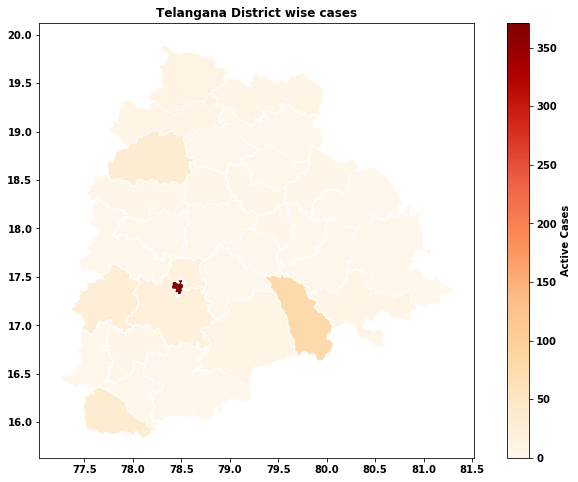

In [5]:
for i in range(4,27):
    
    #choosing sheet name by day
    sheet=str(i)+'-4'
    
    '''sorting geometry data frame and subsetting 
    District_name and geometry'''
    geo_districts=geo_districts.sort_values('Dist_Name').iloc[:,-2:] 
    
    #reading one day at a time
    dist_wise_cases=pd.read_excel(dist_wise_data,sheet)
    
    dist_wise_cases.fillna(0)
    dist_wise_cases.sort_values('District')
    dist_wise_cases.columns=['Dist_Name','Active Cases']
    
    #merging district wise covid data with  district wise geospacial polygons 
    dist_wise_cases_geo=pd.merge(geo_districts,dist_wise_cases,on='Dist_Name')
    dist_wise_cases_geo.sort_values('Active Cases',ascending=False)
    
    plt.rcParams['figure.figsize']=(12, 8)
    
    #plotting the polygons by choropleth
    dist_wise_cases_geo.plot(column='Active Cases',cmap='OrRd',legend=True,legend_kwds={'label':'Active Cases'},edgecolor='white')
    plt.title('Telangana District wise cases')
    
    #saving one-day frame at a time
    plt.savefig('saved/'+sheet+'.jpg')
    plt.show()

In [6]:
import glob
import os
#helps with making gif out of available day frames
import imageio

In [7]:
images=[]
#adding up the frames as list
#if(os.getcwd().split('\\')[-1]!='saved'):
os.chdir('C:\\Users\\happy\\Desktop\\project 001\\Telangana_COVID-19\\saved')
frames_list=list(glob.glob('*.jpg'))
frames_list.sort(key=lambda X: int(X.split('-')[0]))
for f in frames_list:
    images.append(imageio.imread(f))
#hear it is the final step.
imageio.mimsave('./telangana_dist_gif.gif',images,duration=0.9) #check out the gif at saved !!!

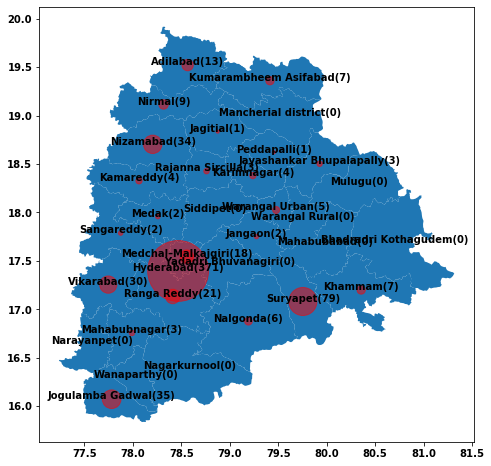

In [8]:
os.chdir('C:\\Users\\happy\\Desktop\\project 001\\Telangana_COVID-19')
geo_districts=geo_districts.sort_values('Dist_Name').iloc[:,-2:] 

#reading one day at a time
dist_wise_cases=pd.read_excel(dist_wise_data,'26-4')
   
dist_wise_cases.fillna(0)
dist_wise_cases.sort_values('District')
dist_wise_cases.columns=['Dist_Name','Active Cases']

#merging district wise covid data with  district wise geospacial polygons 
dist_wise_cases_geo=pd.merge(geo_districts,dist_wise_cases,on='Dist_Name')
dist_wise_cases_geo.sort_values('Active Cases',ascending=False)
dist_wise_cases_geo['center']=dist_wise_cases_geo.geometry.centroid
#print(dist_wise_cases_geo['center'])
x=[]
y=[]
#dist_wise_cases_geo.fillna(0)
for i in dist_wise_cases_geo['center']:
    x.append(i.x)
    y.append(i.y)
ax=dist_wise_cases_geo.plot()

plt.rcParams['figure.figsize']=(20, 13)
plt.scatter(x=x,y=y,s=dist_wise_cases_geo['Active Cases']*10,alpha=0.5,color='red')
ss=dist_wise_cases_geo['Dist_Name'].values
for i in range(len(x)):
    plt.annotate(s=ss[i]+'('+ str(dist_wise_cases_geo['Active Cases'][i]) +')',xy=[x[i],y[i]],horizontalalignment='center')

plt.show()

In [9]:
dist_wise_zones=pd.read_excel(dist_wise_data,'Zones')

In [10]:
dist_wise_zones.sort_values('District')

,District,Zone
10,Adilabad,orange
27,Bhadradri Kothagudem,green
0,Hyderabad,red
19,Jagitial,orange
21,Jangaon,orange
18,Jayashankar Bhupalapally,orange
7,Jogulamba Gadwal,orange
12,Kamareddy,orange
15,Karimnagar,orange
13,Khammam,orange


In [14]:
dist_wise_zones.columns=['Dist_Name','Zone']

In [16]:
dist_wise_zones_geo=pd.merge(geo_districts,dist_wise_zones,on='Dist_Name')
dist_wise_zones_geo

,Dist_Name,geometry,Zone
0,Adilabad,"POLYGON ((78.33344 19.88466, 78.33378 19.88463...",orange
1,Bhadradri Kothagudem,"POLYGON ((80.85065 17.61530, 80.85098 17.61340...",green
2,Hyderabad,"POLYGON ((78.50742 17.48389, 78.50941 17.48292...",red
3,Jagitial,"POLYGON ((78.98890 19.07410, 78.99074 19.07366...",orange
4,Jangaon,"POLYGON ((79.19052 17.99939, 79.19058 17.99938...",orange
5,Jayashankar Bhupalapally,"POLYGON ((80.34460 18.59678, 80.34217 18.59578...",orange
6,Jogulamba Gadwal,"POLYGON ((77.67617 16.36089, 77.68016 16.35614...",orange
7,Kamareddy,"POLYGON ((78.52433 18.46778, 78.52439 18.46766...",orange
8,Karimnagar,"POLYGON ((79.01273 18.67556, 79.01406 18.67288...",orange
9,Khammam,"POLYGON ((80.91930 17.21950, 80.91868 17.21933...",orange


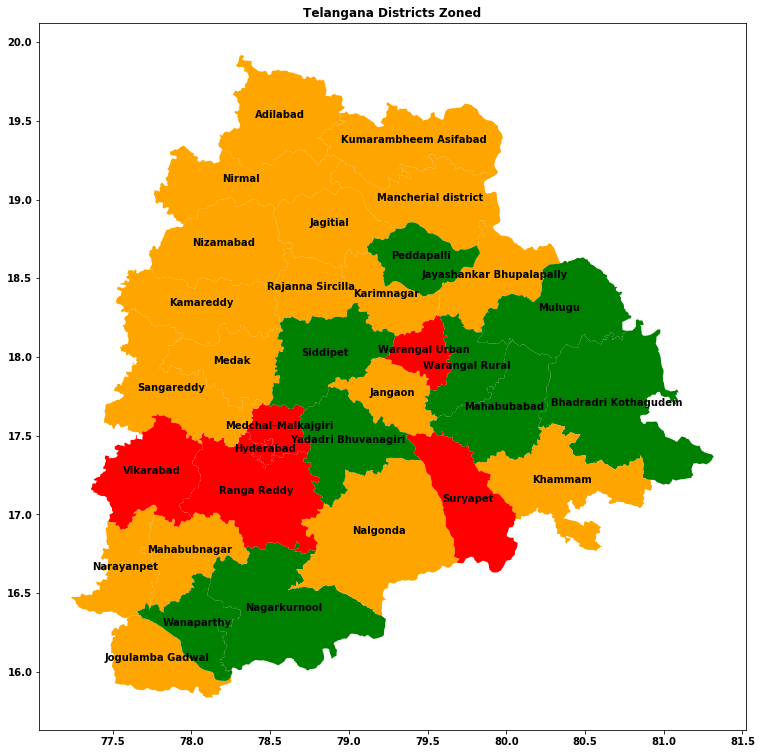

In [18]:
#dist_wise_zones_geo.sort_values('Active Cases',ascending=False)
dist_wise_zones_geo['center']=dist_wise_zones_geo.geometry.centroid
#print(dist_wise_cases_geo['center'])
x=[]
y=[]
#dist_wise_cases_geo.fillna(0)
for i in dist_wise_zones_geo['center']:
    x.append(i.x)
    y.append(i.y)
ax=dist_wise_zones_geo.plot(color=dist_wise_zones_geo['Zone'])

plt.rcParams['figure.figsize']=(20, 13)
plt.title('Telangana Districts Zoned')
#plt.scatter(x=x,y=y,s=dist_wise_zones_geo['Active Cases']*10,alpha=0.5,color='red')
ss=dist_wise_zones_geo['Dist_Name'].values
for i in range(len(x)):
    #plt.annotate(s=ss[i]+'('+ str(dist_wise_zones_geo['Active Cases'][i]) +')',xy=[x[i],y[i]],horizontalalignment='center')
    plt.annotate(s=ss[i],xy=[x[i],y[i]],horizontalalignment='center')
plt.show()

In [40]:
# Literacy rate vs covid-19 cases Telangana
import seaborn as sns
os.chdir('C:\\Users\\happy\\Desktop\\project 001\\Telangana_COVID-19')

dist_wise_data='Day_Wise_District_Data.xlsx'

In [41]:
cumulative_cases=pd.read_excel(dist_wise_data,'cumulative_cases01')
cumulative_cases.sort_values(by='District',ascending=True,inplace=True)

In [42]:
literacy_rate=pd.read_csv('Literacy and Literacy Rate.csv')
literacy_rate.columns

Index(['Districts', 'Males', 'Females', 'Literacy Rate Males',
       'Literacy Rate Females'],
      dtype='object')

In [43]:
literacy_rate['Literacy Rate']=literacy_rate['Literacy Rate Males']+literacy_rate['Literacy Rate Females']
literacy_rate['Literacy Rate']/=2

In [44]:
literacy_rate_01=literacy_rate.iloc[:,[0,-2,-1]]

In [45]:
literacy_rate_01.sort_values(by='Districts')
literacy_rate_01.columns=['District','Literacy Rate Females','Literacy Rate']

In [46]:
literacy_rate_01

,District,Literacy Rate Females,Literacy Rate
0,ADILABAD,53.40,63.440
1,BHADRADRI,59.33,66.445
2,HYDERABAD,79.35,83.170
3,JAGTIAL,50.38,60.490
4,JANGAON,51.69,61.450
5,JAYASHANKAR,50.76,60.405
6,JOGULAMBA,39.48,49.765
7,KAMAREDDY,46.13,56.750
8,KARIMNAGAR,60.38,69.160
9,KHAMMAM,58.31,66.000


In [47]:
cumulative_cases.District.values

array(['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagitial',
       'Jangaon', 'Jayashankar Bhupalapally', 'Jogulamba Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Kumarambheem Asifabad',
       'Mahabubabad', 'Mahabubnagar', 'Mancherial district', 'Medak',
       'Medchal–Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal',
       'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Ranga Reddy',
       'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy',
       'Warangal Rural', 'Warangal Urban', 'Yadadri Bhuvanagiri'],
      dtype=object)

In [48]:
literacy_rate_01.District.values

array(['ADILABAD', 'BHADRADRI', 'HYDERABAD', 'JAGTIAL ', 'JANGAON ',
       'JAYASHANKAR ', 'JOGULAMBA ', 'KAMAREDDY ', 'KARIMNAGAR ',
       'KHAMMAM ', 'KOMARAM BHEEM ', 'MAHABUBABAD', 'MAHABUBNAGAR',
       'MANCHERIAL ', 'MEDAK ', 'MEDCHAL', 'NAGARKURNOOL ', 'NALGONDA ',
       'NIRMAL ', 'NIZAMABAD ', 'PEDDAPALLI ', 'RAJANNA ', 'RANGAREDDY ',
       'SANGAREDDY ', 'SIDDIPET ', 'SURYAPET ', 'VIKARABAD ',
       'WANAPARTHY ', 'WARANGAL (R) ', 'WARANGAL (U)', 'YADADRI '],
      dtype=object)

In [49]:
cumulative_cases.replace(cumulative_cases.District.values,literacy_rate_01.District.values,inplace=True)

In [50]:
#### count=cumulative_cases.District.values==literacy_rate_01.District.values 
##### count.sum()

In [51]:
literacy_vs_cases=pd.merge(literacy_rate_01,cumulative_cases,on='District')
literacy_vs_cases.sort_values(by='Literacy Rate',inplace=True)
literacy_vs_cases

,District,Literacy Rate Females,Literacy Rate,Cases
6,JOGULAMBA,39.48,49.765,45
16,NAGARKURNOOL,43.64,54.245,2
27,WANAPARTHY,45.27,55.500,0
14,MEDAK,45.15,56.330,5
10,KOMARAM BHEEM,47.50,56.745,7
7,KAMAREDDY,46.13,56.750,12
12,MAHABUBNAGAR,46.83,56.800,11
11,MAHABUBABAD,47.81,57.165,1
26,VIKARABAD,48.32,57.950,37
18,NIRMAL,47.14,58.085,20


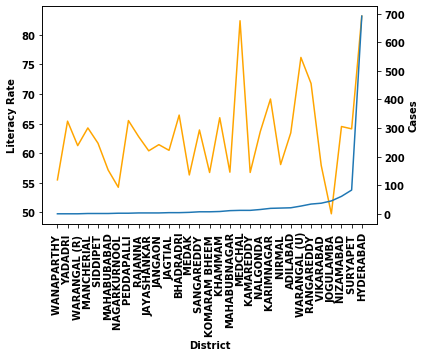

In [52]:
fig,ax=plt.subplots()
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=(15,7)
#literacy_vs_cases.sort_values(by='Literacy Rate',inplace=True)
literacy_vs_cases.sort_values(by='Cases',inplace=True)
sns.lineplot(ax=ax,data=literacy_vs_cases,x='District',y='Literacy Rate',sort=False,color='orange')
ax2=ax.twinx()
sns.lineplot(ax=ax2,data=literacy_vs_cases,x='District',y='Cases',sort=False)
ax.set_xticklabels(literacy_vs_cases.District,rotation=90)

plt.show()

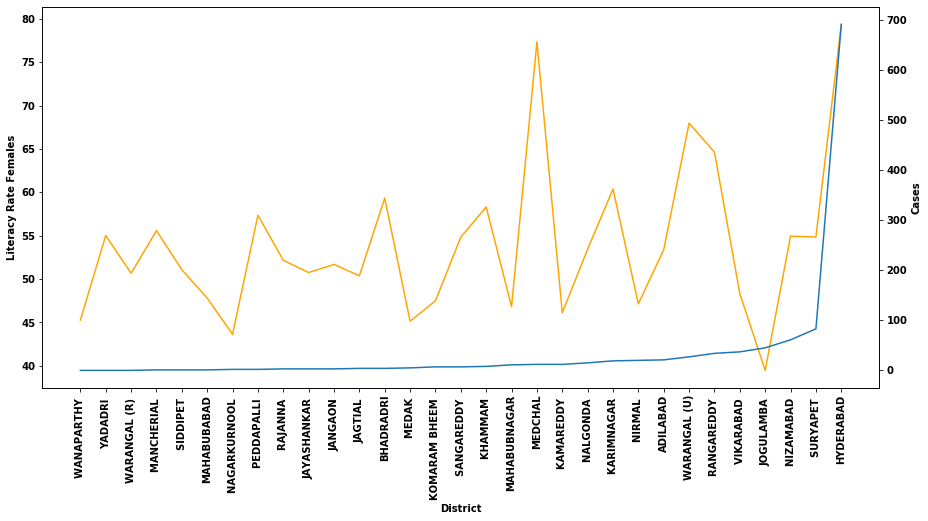

In [53]:
fig,ax=plt.subplots()
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=(15,7)
#literacy_vs_cases.sort_values(by='Literacy Rate',inplace=True)
literacy_vs_cases.sort_values(by='Cases',inplace=True)
sns.lineplot(ax=ax,data=literacy_vs_cases,x='District',y='Literacy Rate Females',sort=False,color='orange')
ax2=ax.twinx()
sns.lineplot(ax=ax2,data=literacy_vs_cases,x='District',y='Cases',sort=False)
ax.set_xticklabels(literacy_vs_cases.District,rotation=90)

plt.show()

In [54]:
District_Density=pd.read_excel('District Area and Desnity.xlsx')
District_Density=District_Density.iloc[1:,:]
District_Density.sort_values(by='PARTICULARS',inplace=True)

In [55]:
District_Density.PARTICULARS.values

array(['ADILABAD', 'BHADRADRI', 'HYDERABAD', 'JAGTIAL ', 'JANGAON ',
       'JAYASHANKAR ', 'JOGULAMBA ', 'KAMAREDDY ', 'KARIMNAGAR ',
       'KHAMMAM ', 'KOMARAM BHEEM ', 'MAHABUBABAD', 'MAHABUBNAGAR',
       'MANCHERIAL ', 'MEDAK ', 'MEDCHAL', 'NAGARKURNOOL ', 'NALGONDA ',
       'NIRMAL ', 'NIZAMABAD ', 'PEDDAPALLI ', 'RAJANNA ', 'RANGAREDDY ',
       'SANGAREDDY ', 'SIDDIPET ', 'SURYAPET ', 'VIKARABAD ',
       'WANAPARTHY ', 'WARANGAL (R) ', 'WARANGAL (U)', 'YADADRI '],
      dtype=object)

In [56]:
literacy_vs_cases.sort_values(by='District').District.values

array(['ADILABAD', 'BHADRADRI', 'HYDERABAD', 'JAGTIAL ', 'JANGAON ',
       'JAYASHANKAR ', 'JOGULAMBA ', 'KAMAREDDY ', 'KARIMNAGAR ',
       'KHAMMAM ', 'KOMARAM BHEEM ', 'MAHABUBABAD', 'MAHABUBNAGAR',
       'MANCHERIAL ', 'MEDAK ', 'MEDCHAL', 'NAGARKURNOOL ', 'NALGONDA ',
       'NIRMAL ', 'NIZAMABAD ', 'PEDDAPALLI ', 'RAJANNA ', 'RANGAREDDY ',
       'SANGAREDDY ', 'SIDDIPET ', 'SURYAPET ', 'VIKARABAD ',
       'WANAPARTHY ', 'WARANGAL (R) ', 'WARANGAL (U)', 'YADADRI '],
      dtype=object)

In [57]:
###count=District_Density.PARTICULARS.values==literacy_vs_cases.sort_values(by='District').District.values
##count.sum()
District_Density.columns=['District', 'Geographical Area  (Sq. Kms.)',
       'Density of  Population (per Sq. Km.)']

In [58]:
literacy_vs_cases_density=pd.merge(literacy_vs_cases,District_Density,on='District')

In [59]:
literacy_vs_cases_density

,District,Literacy Rate Females,Literacy Rate,Cases,Geographical Area (Sq. Kms.),Density of Population (per Sq. Km.)
0,WANAPARTHY,45.27,55.500,0,2152.00,268.474907
1,YADADRI,55.02,65.420,0,3092.00,239.148771
2,WARANGAL (R),50.67,61.285,0,2175.00,330.361839
3,MANCHERIAL,55.59,64.275,1,4016.46,200.932413
4,SIDDIPET,51.08,61.690,1,3632.00,278.652258
5,MAHABUBABAD,47.81,57.165,1,2877.00,269.221064
6,NAGARKURNOOL,43.64,54.245,2,6924.00,124.460716
7,PEDDAPALLI,57.36,65.520,2,2236.00,355.694097
8,RAJANNA,52.17,62.820,3,2019.00,273.421000
9,JAYASHANKAR,50.76,60.405,3,6175.00,115.211984


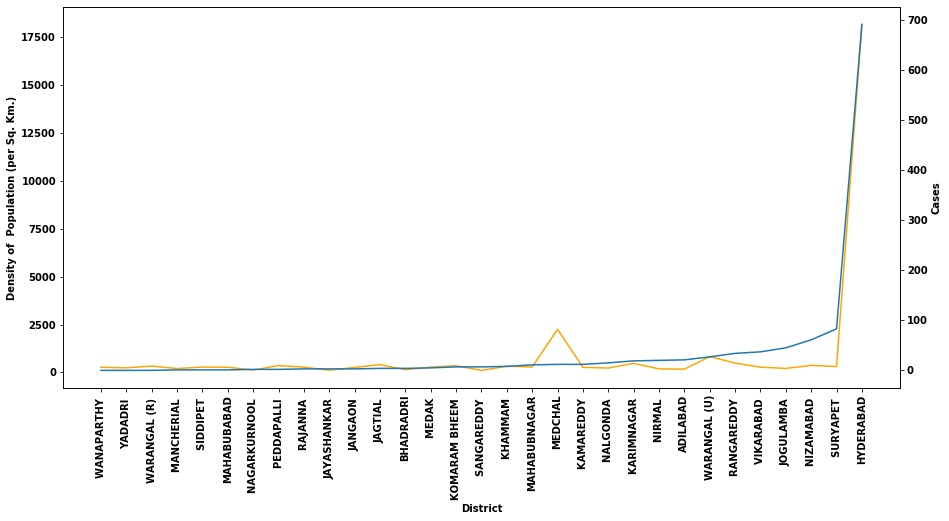

In [60]:
fig,ax=plt.subplots()
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=(15,7)
#literacy_vs_cases.sort_values(by='Literacy Rate',inplace=True)
literacy_vs_cases_density.sort_values(by='Cases',inplace=True)
sns.lineplot(ax=ax,data=literacy_vs_cases_density,x='District',y='Density of  Population (per Sq. Km.)',sort=False,color='orange')
ax2=ax.twinx()
sns.lineplot(ax=ax2,data=literacy_vs_cases_density,x='District',y='Cases',sort=False)
ax.set_xticklabels(literacy_vs_cases.District,rotation=90)

plt.show()

In [126]:
import plotly
from plotly import graph_objects as go
from plotly import offline as pyo
import numpy as np
os.chdir('C:\\Users\\happy\\Desktop\\project 001\\Telangana_COVID-19')
#print(np.arange(1,5))

In [127]:
#frames
#fig,ax=plt.subplot()
frames=[]
x_val=literacy_vs_cases_density.District.values
y_val=literacy_vs_cases_density.loc[:,'Density of  Population (per Sq. Km.)'].values
y2_val=literacy=literacy_vs_cases_density.loc[:,'Cases'].values
for i in np.arange(1,33):
    curr_frame=go.Frame(data=[go.Scatter(x=list(x_val[:i]),y=list(y_val[:i])),
                             go.Scatter(x=list(x_val[:i]),y=list(y2_val[:i]))])
    frames.append(curr_frame)
frames[31]

Frame({
    'data': [{'type': 'scatter',
              'x': [WANAPARTHY , YADADRI , WARANGAL (R) , MANCHERIAL , SIDDIPET ,
                    MAHABUBABAD, NAGARKURNOOL , PEDDAPALLI , RAJANNA , JAYASHANKAR
                    , JANGAON , JAGTIAL , BHADRADRI, MEDAK , SANGAREDDY , KOMARAM
                    BHEEM , KHAMMAM , MAHABUBNAGAR, MEDCHAL, KAMAREDDY , NALGONDA ,
                    KARIMNAGAR , NIRMAL , ADILABAD, WARANGAL (U), RANGAREDDY ,
                    VIKARABAD , JOGULAMBA , NIZAMABAD , SURYAPET , HYDERABAD],
              'y': [268.474907063197, 239.14877102199225, 330.3618390804598,
                    200.93241312001115, 278.6522577092511, 269.2210636079249,
                    124.46071634893126, 355.69409660107334, 273.4210004952947,
                    115.21198380566801, 258.85557586837297, 407.36544026457216,
                    142.8920219163437, 275.4102831878098, 346.9634441327776,
                    105.74251742517426, 321.4031185507911, 281.3148284800666,
 

In [138]:
pyo.init_notebook_mode(connected=True)
fig=plotly.tools.make_subplots(specs=[[{ 'secondary_y' : True }]])
#fig=go.Figure()
#fig=go.Figure(#data=[go.Scatter(x=list(np.arange(i)),y=list(np.arange(i)**2),mode='lines')],
#    data=[go.Scatter(x=np.array(x_val[0]),y=np.array(y_val[0]),mode="lines"),
#          go.Scatter(x=np.array(x_val[0]),y=np.array(y2_val[0]),mode="lines",line=dict(color='orange'))],
#    layout={'title':'Simple plot',
#           'xaxis':{'title':'District'},'yaxis':{'title':'Density'}
#           },
#    frames=frames
#             )
#fig.update_layout=dict(add_annotation=True)
#fig.show()
fig.add_trace(go.Scatter(x=np.array(x_val[0]),y=np.array(y_val[0]),mode="lines",name='Density'),secondary_y=False)
fig.add_trace(go.Scatter(x=np.array(x_val[0]),y=np.array(y2_val[0]),mode="lines",line=dict(color='orange'),name='No.of Cases'),secondary_y=True)
#fig.update_traces(selector=dict(line_color='orange'),secondary_y=True)
#fig.frames=frames
fig.update_layout(title_text='Districts Density vs No.of Cases')
fig.update_yaxes(title_text='<br>Density</br>',secondary_y=False)
fig.update_yaxes(title_text='<br>No.Of Cases</br>',secondary_y=True)
#for i in np.arange(31):
#    fig.frames=frames[:i+1]
#    fig.write_image('Density_Cases/'+str(i)+'.jpg')
fig.frames=frames
pyo.iplot(fig,filename='Districts Density vs No.of Cases.html')

In [139]:
fig.write_html('./Districts Density vs No.of Cases.html')
fig.write_image('./Districts Density vs No.of Cases.jpeg')